# Bias optimality landscape analysis
This analysis asks whether adjustments in evidence and start shift bias are (approximately) optimal wrt percent correct. To do this, a parameter sweep over the biases was plotted, and subjects' actual fit biases were analyzed relative to the landscape formed by the sweep. 

Produces Figures 4e-f. Relies on sweep conducted with ../FitGDDM/bias_sweep.py.

In [1]:
%graphics
imatlab_export_fig('print-svg')
set(0,'defaultfigurecolor',[1 1 1])
set(groot,'DefaultAxesFontName','Arial')

%data files for sweep
sweep_info = readtable('sweep_info.csv','ReadVariableNames',true,'Delimiter',','); 


logit = @(x) log(x./(1-x));
clevel = .97; %what contour level is everything based on?

## priorOnly

In [2]:
%load in per-subject landscapes

sweep_infoi = sweep_info(sweep_info.bias_type==1,:);

%% per subject version

[pcs,subj_z,subj_v,zs,mes]=sweep2mat(sweep_infoi.param_file{:},sweep_infoi.sweep_dir{:},...
    sweep_infoi.bias_type,[.1,.9]);
priorLabel = fieldnames(pcs);

%convert z to logit scale
zs_logit = logit(zs);
subj_zlogit = structfun(logit,subj_z,'UniformOutput',false);

### How close does each subject get to max performance given all other params?

Low
median: 0.97, range: 0.76-1.00

No
median: 1.00, range: 0.97-1.00

High
median: 0.98, range: 0.86-1.00



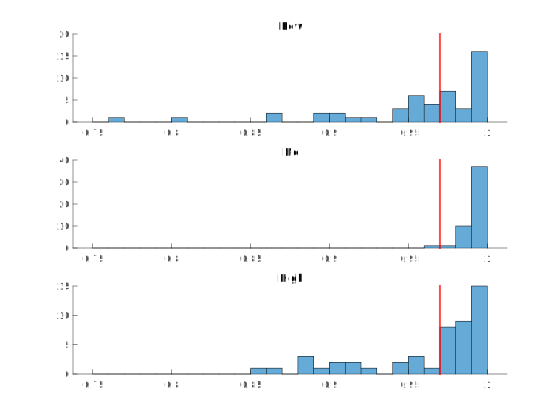

In [3]:
%FINAL

figure();hold on;
for p=1:length(priorLabel)
    subplot(3,1,p);hold on;
    incon.(priorLabel{p}) = zeros(size(subj_z.(priorLabel{p})));
    pcsnorm = cellfun(@(x) x./max(x,[],'all'),struct2cell(pcs.(priorLabel{p})),'UniformOutput',false);
    for s=1:length(pcsnorm)
        incon.(priorLabel{p})(s) = interp2(zs_logit,mes,pcsnorm{s}',...
            subj_zlogit.(priorLabel{p})(s),subj_v.(priorLabel{p})(s));
    end
    histogram(incon.(priorLabel{p}),[.75:.01:1])
    title(priorLabel{p})
    xline(clevel,'-r','LineWidth',2);
    
    %what is the median/range at each condition?
    disp(priorLabel{p})
    fprintf('median: %.2f, range: %.2f-%.2f\n\n',...
        median(incon.(priorLabel{p})),min(incon.(priorLabel{p})),max(incon.(priorLabel{p})))
end

### where do subjects fall compared to mean 97% contour
Figure 4e

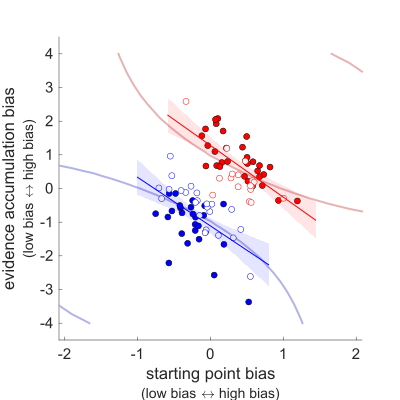

In [4]:
zs_logit = logit(zs);
subj_zlogit = structfun(logit,subj_z,'UniformOutput',false);

prior_color = {'b','r'};
prior_colorRGB = [0 0 1;1 0 0];
prior_levels = {'Low','High'};
cont_color = [.7 .7 .9; .9 .7 .7];
dotcolsm = [1 0 0; 0 0 0];
this_figdim = [0 0 400 400];
set(groot,'DefaultAxesFontSize',15)
set(groot,'DefaultLineLineWidth',1)
set(groot,'DefaultScatterMarkerFaceColor',[1 1 1])
figure('Position',this_figdim);hold on;
for p=1:length(prior_levels)
    %this is a long road from the structs to a matrix for averaging
    pcs_mean = pcs.(prior_levels{p});
    pcs_mean = struct2cell(pcs_mean);
    pcs_mean = cellfun(@(x) x./max(x,[],'all'),pcs_mean,'UniformOutput',false);
    pcs_mean = adj_cell2mat(pcs_mean);
    
    %compute mean
    pcs_mean = squeeze(mean(pcs_mean,1));
    pcs_mean = pcs_mean./max(pcs_mean,[],'all');
    
    ax = subplot(1,1,1);
    M=contour(zs_logit,mes,pcs_mean',[clevel clevel],'LineWidth',2,'LineColor',cont_color(p,:));
end
ylabel({'evidence accumulation bias','\fontsize{14}(low bias \leftrightarrow high bias)'});
xlabel({'starting point bias','\fontsize{14}(low bias \leftrightarrow high bias)'});

for p=1:length(prior_levels)
    thresh = (incon.(prior_levels{p})<clevel);
    this_z = subj_zlogit.(prior_levels{p});
    this_v = subj_v.(prior_levels{p});
    scatter(this_z(~thresh),this_v(~thresh),prior_color{p},...
        'filled','MarkerEdgeColor','k')
    scatter(this_z(thresh),this_v(thresh),prior_color{p})
    
    %plot CIs
    this_mdl = fitlm(this_z,this_v);
    Xrange = linspace(min(this_z)-.25,max(this_z)+.25,100)';
    [this_pred,this_ci] = predict(this_mdl,Xrange);
    hold on;plot(Xrange,this_pred,['-',prior_color{p}],'LineWidth',1)
    this_ci1 = (this_ci(:,2) - this_ci(:,1))./2;
    h=shadedErrorBar(Xrange,this_pred,this_ci1,prior_color{p},1);
    delete(h.mainLine);
    delete(h.edge);
    h.patch.FaceAlpha = .1;
    
end
xlim([zs_logit(1) zs_logit(end)]);
ylim([-4.5 4.5]);
axis square
set(gcf,'Renderer','painters')

set(groot,'DefaultAxesFontSize','factory')
set(groot,'DefaultLineLineWidth','factory')
set(groot,'DefaultScatterMarkerFaceColor','factory')

## PretoneOnly

In [5]:
%load in per-subject landscapes

sweep_infoi = sweep_info(sweep_info.bias_type==2,:);

[pcs,subj_z,subj_v,zs,mes]=sweep2mat(sweep_infoi.param_file{:},sweep_infoi.sweep_dir{:},...
    sweep_infoi.bias_type,[logit(.1),logit(.9)]);

ptLabel = fieldnames(pcs);

### How close does each subject get to max performance given all other params?

LL
median: 0.99, range: 0.62-1.00

HH
median: 0.99, range: 0.80-1.00



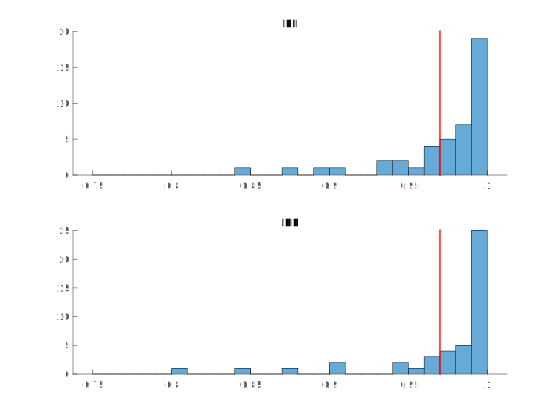

In [6]:
%FINAL

figure();hold on;
incon = [];
for p=1:length(ptLabel)
    subplot(length(ptLabel),1,p);hold on;
    incon.(ptLabel{p}) = zeros(size(subj_z.(ptLabel{p})));
    pcsnorm = cellfun(@(x) x./max(x,[],'all'),struct2cell(pcs.(ptLabel{p})),'UniformOutput',false);
    for s=1:length(pcsnorm)
        incon.(ptLabel{p})(s) = interp2(zs,mes,pcsnorm{s}',subj_z.(ptLabel{p})(s),subj_v.(ptLabel{p})(s));
    end
    histogram(incon.(ptLabel{p}),[.75:.01:1])
    title(ptLabel{p})
    xline(clevel,'-r','LineWidth',2);
    
    %what is the median/range at each condition?
    disp(ptLabel{p})
    fprintf('median: %.2f, range: %.2f-%.2f\n\n',...
        median(incon.(ptLabel{p})),min(incon.(ptLabel{p})),max(incon.(ptLabel{p})))
end

### where do subjects fall compared to mean 97% contour
Figure 4f

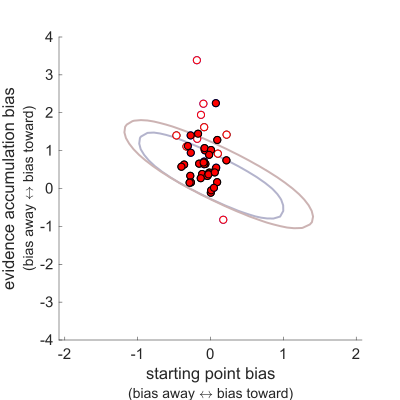

In [7]:
prior_color = {'b','r'};
cont_color = [.7 .7 .8; .8 .7 .7];
this_figdim = [0 0 400 400];
set(groot,'DefaultAxesFontSize',15)
set(groot,'DefaultLineLineWidth',1)
set(groot,'DefaultScatterMarkerFaceColor',[1 1 1])
figure('Position',this_figdim);hold on;
for p=1:length(ptLabel)
    %this is a long road from the structs to a matrix for averaging
    pcs_mean = pcs.(ptLabel{p});
    pcs_mean = struct2cell(pcs_mean);
    pcs_mean = cellfun(@(x) x./max(x,[],'all'),pcs_mean,'UniformOutput',false);
    pcs_mean = adj_cell2mat(pcs_mean);
    
    %compute mean
    pcs_mean = squeeze(mean(pcs_mean,1));
    pcs_mean = pcs_mean./max(pcs_mean,[],'all');
    
    ax = subplot(1,1,1);
    M=contour(zs,mes,pcs_mean',[clevel clevel],'LineWidth',2,'LineColor',cont_color(p,:));
end
xlabel({'starting point bias','\fontsize{14}(bias away \leftrightarrow bias toward)'});
ylabel({'evidence accumulation bias','\fontsize{14}(bias away \leftrightarrow bias toward)'});

for p=1:length(ptLabel)
    thresh = (incon.(ptLabel{p})<clevel);
    scatter(subj_z.(ptLabel{p})(thresh),subj_v.(ptLabel{p})(thresh),50,prior_color{p},...
        'LineWidth',1)
    scatter(subj_z.(ptLabel{p})(~thresh),subj_v.(ptLabel{p})(~thresh),50,prior_color{p},...
        'filled','MarkerEdgeColor','k','LineWidth',1)
end
xlim([zs(1) zs(end)]);
ylim([mes(1) mes(end)]);
axis square

set(groot,'DefaultAxesFontSize','factory')
set(groot,'DefaultLineLineWidth','factory')
set(groot,'DefaultScatterMarkerFaceColor','factory')

#### now just LL

LL


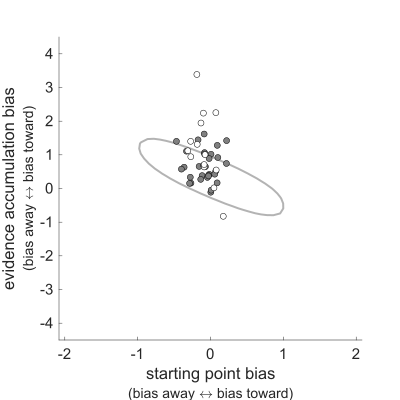

In [8]:
this_figdim = [0 0 400 400];
set(groot,'DefaultAxesFontSize',15)
set(groot,'DefaultLineLineWidth',1)
set(groot,'DefaultScatterMarkerFaceColor',[1 1 1])
set(groot,'DefaultScatterMarkerFaceAlpha',1)
set(groot,'DefaultScatterMarkerEdgeAlpha',1)
figure('Position',this_figdim);hold on;
for p=1:1
    %this is a long road from the structs to a matrix for averaging
    disp(ptLabel{p})
    pcs_mean = pcs.(ptLabel{p});
    pcs_mean = struct2cell(pcs_mean);
    pcs_mean = cellfun(@(x) x./max(x,[],'all'),pcs_mean,'UniformOutput',false);
    pcs_mean = adj_cell2mat(pcs_mean);
    
    %compute mean
    pcs_mean = squeeze(mean(pcs_mean,1));
    pcs_mean = pcs_mean./max(pcs_mean,[],'all');
    
    ax = subplot(1,1,1);
    M=contour(zs,mes,pcs_mean',[clevel clevel],'LineWidth',2,'LineColor',[.7 .7 .7]);
end
xlabel({'starting point bias','\fontsize{14}(bias away \leftrightarrow bias toward)'});
ylabel({'evidence accumulation bias','\fontsize{14}(bias away \leftrightarrow bias toward)'});

for p=1:1 
    thresh = (incon.(ptLabel{p})<clevel);
    this_z = subj_z.(ptLabel{p});
    this_v = subj_v.(ptLabel{p});
    scatter(this_z(~thresh),this_v(~thresh),...
        'filled','MarkerEdgeColor','k','MarkerFaceColor',[.5 .5 .5])
    scatter(this_z(thresh),this_v(thresh),'k')
    
end
xlim([zs(1) zs(end)]);
ylim([-4.5 4.5]); 
axis square

set(groot,'DefaultAxesFontSize','factory')
set(groot,'DefaultLineLineWidth','factory')
set(groot,'DefaultScatterMarkerFaceColor','factory')
set(groot,'DefaultScatterMarkerFaceAlpha','factory')
set(groot,'DefaultScatterMarkerEdgeAlpha','factory')